In [72]:
# starter
import csv
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
import numpy as np
from sklearn import linear_model

In [142]:
data = []
with open('100k_a.csv', mode ='r') as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        data.append(lines) # u, sid, s, start, stop

In [42]:
data[0]

['1', '33842865744', 'mithrain', '154', '156']

In [49]:
df = pd.read_csv('100k_a.csv', header=None)
df.columns =['user', 'stream_id', 'streamer', 'start', 'stop']
df

,user,stream_id,streamer,start,stop
0,1,33842865744,mithrain,154,156
1,1,33846768288,alptv,166,169
2,1,33886469056,mithrain,587,588
3,1,33887624992,wtcn,589,591
4,1,33890145056,jrokezftw,591,594
...,...,...,...,...,...
3051728,100000,34167930576,mckytv,3582,3583
3051729,100000,34168288656,natehill,3582,3583
3051730,100000,34169594512,fortnite,3582,3584
3051731,100000,34180223072,highdistortion,3709,3711


In [67]:
df['interval'] = df['stop'] - df['start']

In [204]:
interval_count = df.groupby('interval').count()['user']
interval_count

interval
1     1559891
2      498252
3      263958
4      168944
5      115769
       ...   
84          3
88          2
90          2
92          3
97          1
Name: user, Length: 86, dtype: int64

In [201]:
X = (np.array(list(interval_count.keys()))).reshape(-1, 1)
y = np.array(list(dict(interval_count).values()))
reg = linear_model.LinearRegression().fit(X, np.log(y))

In [202]:
reg.score(X, np.log(y))

0.965280831904641

In [190]:
reg.intercept_

11.62539382132372

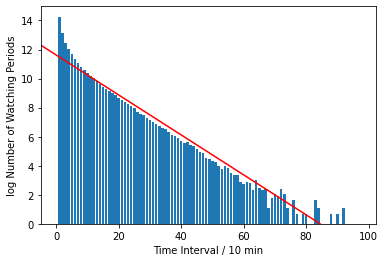

In [200]:
plt.bar(interval_count.keys(), np.log(np.array(list(dict(interval_count).values()))))
plt.axline((0, reg.intercept_), slope=reg.coef_[0], color='red')
plt.xlabel('Time Interval / 10 min')
plt.ylabel('log Number of Watching Periods')
plt.show()